In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('./avo_combo_all.csv')
df = df.fillna(' ')
df = df.drop('Unnamed: 0', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df

,Date,0,1,2,3,4,5,6,7,8,...,GNP,Unemployment Rate,Labor Force Participation Rate,Personal Consumption Expenditures,Trade Balance,Real Export,Personal Income,Personal Saving,quarter,year
0,2015-01-04,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Avocados more expensive in Chile than in the N...,California's Drought Pushes Food Prices Higher,...,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015
89,2015-01-11,,,,,,,,,,...,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015
90,2015-01-18,,,,,,,,,,...,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015
1,2015-01-25,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Have You Eaten Your Last Avocado?,Avocados more expensive in Chile than in the N...,...,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015
2,2015-02-01,An Avocado Success Story | Mercatus Center,[PDF] THE U.S. MARKET FOR AVOCADO - USAID,Column: An avocado success story - Tampa Bay T...,[PDF] Examining Consumer Preferences Within th...,"The rise of the avocado, America's new favorit...",[PDF] Sample Avocado Production Costs and Prof...,The Selling of the Avocado - The Atlantic,Avocados more expensive in Chile than in the N...,Have You Eaten Your Last Avocado?,...,18405.862,5.4,62.8,12224.7,-40254.0,1.1,13696.9,1027.7,Q1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2018-02-25,,,,,,,,,,...,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018
166,2018-03-04,,,,,,,,,,...,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018
167,2018-03-11,,,,,,,,,,...,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018
88,2018-03-18,"Avocado prices have doubled in the last year, ...",China's middle class is boosting demand for av...,Avocado prices smash records | Stats NZ,How Lower Avocado Prices Relate to Supply and ...,Market Trend: Changes in Wholesale Prices of A...,Records smashed as avocado prices in New Zeala...,Here's Why You Should Buy Avocados NOW - DealNews,Avocado off the menu as shortage sends prices ...,Solved Consider the supply of avocados. Explai...,...,20772.518,3.9,62.9,13850.8,-44120.0,2.2,15493.0,1124.3,Q1,2018


In [3]:
y = df['AveragePrice']

numerical_features = df[['Unemployment Rate', 'Labor Force Participation Rate', 'Personal Consumption Expenditures', 'Trade Balance', 'Real Export', 'Personal Income', 'Personal Saving']]

text_features = df[['0','1' ,'2']]

In [4]:
text_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
text_features_vectorized0 = text_vectorizer.fit_transform(text_features[text_features.columns[0]])
text_features_vectorized1 = text_vectorizer.fit_transform(text_features[text_features.columns[1]])
text_features_vectorized2 = text_vectorizer.fit_transform(text_features[text_features.columns[2]])

In [5]:
# Combine text and numerical features
X = pd.concat([pd.DataFrame(text_features_vectorized0.toarray()), numerical_features], axis=1)
X = pd.concat([pd.DataFrame(text_features_vectorized1.toarray()), X], axis=1)
X = pd.concat([pd.DataFrame(text_features_vectorized2.toarray()), X], axis=1)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions_test = model.predict(X_test)

In [9]:
# Evaluate the model on test set
mse = mean_squared_error(y_test, predictions_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.015919788780826796


In [10]:
# p
predictions_all = model.predict(X)

In [11]:
df['predictions'] = predictions_all

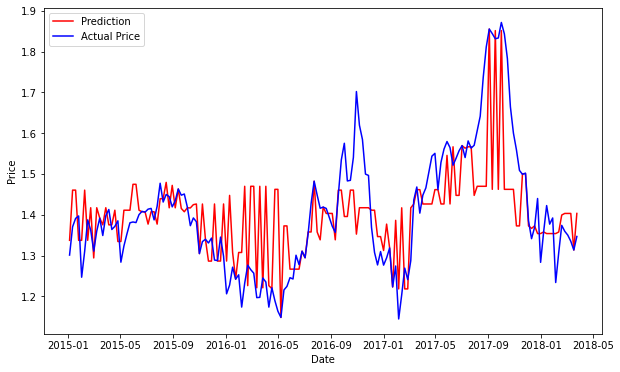

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(pd.to_datetime(df['Date']), df['predictions'], label='Prediction', color='red')
plt.plot(pd.to_datetime(df['Date']), df['AveragePrice'], label='Actual Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()